# <Center>Credit Card Customer Churn Prediction</Center>


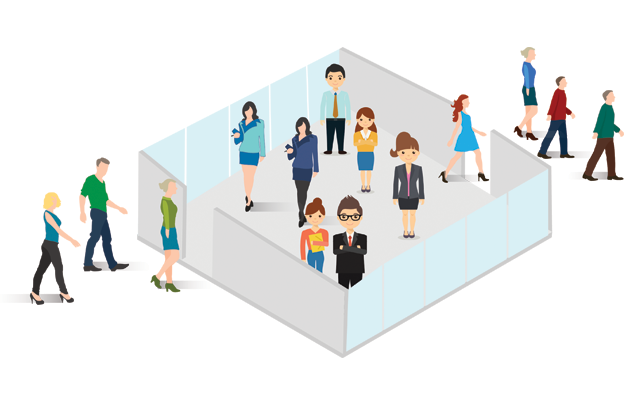

# Introduction

<b>Business Problem : </b>  
Seorang manajer bank kecewa karena dari waktu ke waktu banyak orang yang berhenti menggunakan layanan kartu kreditnya dari bank tersebut (Customer Churn) . Oleh karena itu, manajer bank ingin mencari tahu siapa saja orang  yang akan meninggalkan bank di masa depan sehingga dia dapat memberikan penawaran yang lebih baik kepada pelanggan tersebut agar tetap bersama mereka.

# Task Details

Prioritas utama dalam masalah bisnis ini adalah : <b> Mengidentifikasi pelanggan yang mengalami churn. </b>
Oleh karena itu, kita akan menyelesaikan dengan langkah-langkah berikut :
1. Mengumpulkan data
2. Mendeskripsikan data
3. Analisis mendalam tentang data 
4. Data Preprocessing dan Feature Engineering
5. Membangun model
6. Analisis model

Lalu, terdapat beberapa isu tambahan terkait hasil prediksi yang perlu kita pertimbangkan dalam masalah bisnis ini :
Ketika memprediksi pelanggan yang tidak churning sebagai pelanggan yang churning, hal itu tidak akan merugikan bisnis sehingga jika terdapat hasil prediksi seperti ini tidak perlu terlalu dipermasalahkan. 
Namun, jika terdapat hasil prediksi pelanggan yang churning sebagai Non-churning, maka hal itu dapat merugikan bisnis karena kita tidak berhasil menyelesaikan masalah utama bisnis yaitu  mengidentifikasi pelanggan yang mengalami churn sehingga kita tidak dapat meningkatkan layanan. Oleh karena itu, diperlukan  recall yang tinggi untuk memastikan bahwa mengidentifikasikan pelanggan yang churning sebagai Non-churning dengan benar.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score,f1_score

## Data Loading

In [2]:
df = pd.read_csv('BankChurners.csv')

## Feature Description
<b>CLIENTNUM</b>: Client number. Unique identifier for the customer holding the account

<b>Customer_Age</b>: Demographic variable - Customer's Age in Years

<b>Gender</b>: Demographic variable -  M=Male, F=Female

<b>Dependent_count</b>: Demographic variable - Number of dependents

<b>Education_Level</b>: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)

<b>Marital_Status</b>: Demographic variable -  Married, Single, Divorced, Unknown

<b>Income_Category</b>: Demographic variable - Annual Income Category of the account holder (<  40K, 40K - 60K,  60K− 80K,  80K− 120K, > $120K, Unknown)

<b>Card_Category</b>: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)

<b>Months_on_book</b>: Period of relationship with bank

<b>Total_Relationship_Count</b>: Total no. of products held by the customer

<b>Months_Inactive_12_mon</b>: No. of months inactive using credit card in the last 12 months

<b>Contacts_Count_12_mon</b>: No. of Contacts in the last 12 months

<b>Credit_Limit</b>: Credit Limit on the Credit Card

<b>Total_Revolving_Bal</b>: Total Revolving Balance on the Credit Card

<b>Avg_Open_To_Buy</b>: Open to Buy Credit Line (Average of last 12 months) (The difference between the credit limit assigned to a cardholder account and the present balance on the account)

<b>Total_Amt_Chng_Q4_Q1</b>: Change in Transaction Amount (Q4 over Q1)

<b>Total_Trans_Amt</b>: Total Transaction Amount (Last 12 months)

<b>Total_Trans_Ct</b>: Total Transaction Count (Last 12 months)

<b>Total_Ct_Chng_Q4_Q1</b>: Change in Transaction Count (Q4 over Q1)

<b>Avg_Utilization_Ratio</b>: Average Card Utilization Ratio (In other words, it's how much you currently owe divided by your credit limit)

## Target
Target
Attrition_Flag: Internal event (customer activity) variable => if the account is closed then 1(Attrited Customer) else 0(Existing Customer)

# Data Preparation

## A. Ringkasan mengenai data

### 1) Deskripsi setiap kelompok fitur

In [3]:
# Melihat deskripsi statistik dari kelompok fitur numerik
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,574.688943,4404.086304,64.858695,518.464910,247.333503
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,310.108088,3397.129254,23.472570,316.647227,274.452904
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,484.000000,2155.500000,45.000000,316.000000,0.060000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,674.000000,3899.000000,67.000000,625.000000,132.000000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,792.000000,4741.000000,81.000000,761.000000,463.000000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,999.000000,18484.000000,139.000000,981.000000,999.000000


In [4]:
# Melihat deskripsi statistik dari kelompok fitur kategorik
df.describe(include=object)

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [5]:
#Keseluruhan dataset
df.shape

(10127, 21)

### 2) Jumlah Atribut

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

> Dari hasil diatas terlihat bahwa terdapat 15 numeric variable dan 6 categorical variable

### 3) Jumlah missing values dan duplikasi data  

In [7]:
miss_val = df.isna().sum()
dpl = df.duplicated().sum()
print(miss_val)
print("Jumlah duplikasi data : " + str(dpl))

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64
Jumlah duplikasi data : 0


> Dari hasil diatas terlihat bahwa tidak terdapat missing values dan duplikasi pada dataset

### 4) Cek kemungkinan adanya Outlier

In [8]:
num_cols = df.select_dtypes(include=np.number)

In [9]:
list_outlier = []
def cek_outlier(data):
    for i in data.columns:
        Q1 = data[i].quantile(0.25)
        Q3 = data[i].quantile(0.75)
        IQR = Q3-Q1
        RLB = Q1-1.5*IQR
        RUB = Q3+1.5*IQR
        count_outlier = ((data[i]<RLB) | (data[i]>RUB)).sum()
        if count_outlier > 0 :
            print(i + " =  " + str(count_outlier))
            list_outlier.append(i)

cek_outlier(num_cols)

Customer_Age =  2
Months_on_book =  386
Months_Inactive_12_mon =  331
Contacts_Count_12_mon =  629
Credit_Limit =  984
Avg_Open_To_Buy =  963
Total_Amt_Chng_Q4_Q1 =  1954
Total_Trans_Amt =  896
Total_Trans_Ct =  2


> Terlihat bahwa terdapat kemungkinan outlier di beberapa fitur

## B. Eksplorasi data

### 1) Visualisasi Categorical Variables

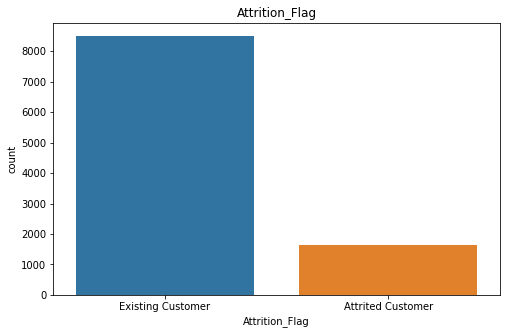

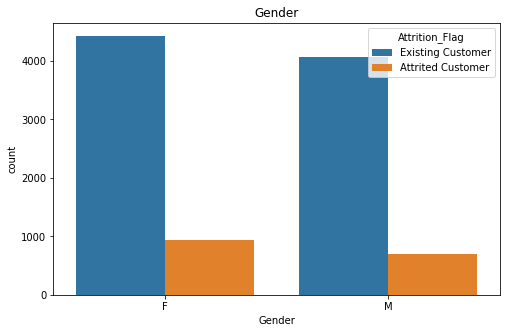

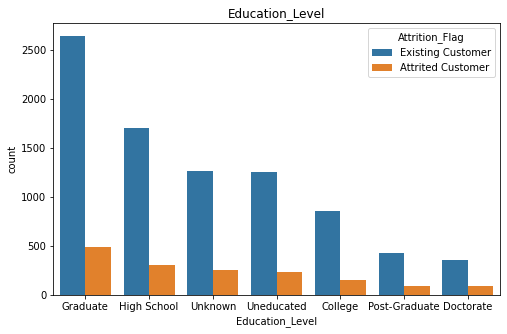

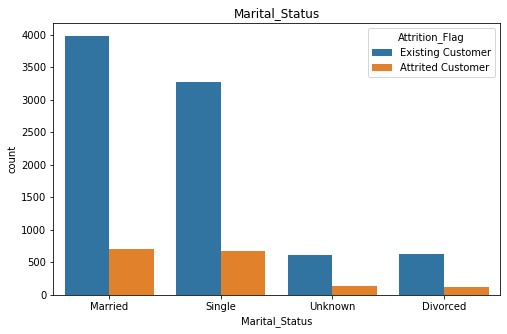

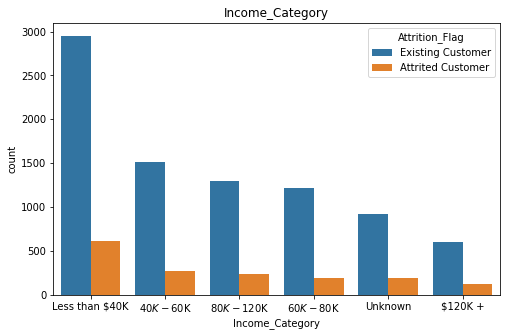

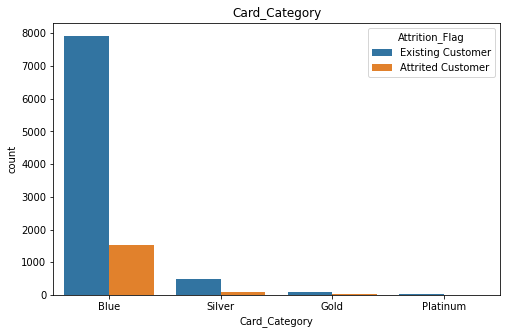

In [10]:
categorical_features = df.select_dtypes(include="object")

for a_feature in categorical_features:
    plt.figure(figsize=(8, 5))
    plt.title(a_feature)
    if (a_feature != "Attrition_Flag"):
        sns.countplot(x=categorical_features[a_feature],hue=categorical_features['Attrition_Flag'],
                      order = categorical_features[a_feature].value_counts().index)
    else :
        sns.countplot(x=categorical_features[a_feature])

><br><b>Dari visualisasi Categorical Features diatas, dapat kita simpulkan beberapa point :</b><br/>
<br>1.Imbalanced dataset dengan target column mempunyai perbandingan sekitar 85% : 15%</br> 
<br>2.Perempuan yang memiliki credit card lebih banyak daripada  laki-laki<br>
3.Orang yang telah lulus pendidikan lebih banyak yang memiliki credit card<br>
4.Orang yang telah menikah lebih banyak yang memiliki credit card<br>
5.Kebanyakan orang memiliki pendapatan kurang dari 40k$<br>
6.Hampir 90% orang memiliki blue card

### 2) Visualisasi Numerical Variables

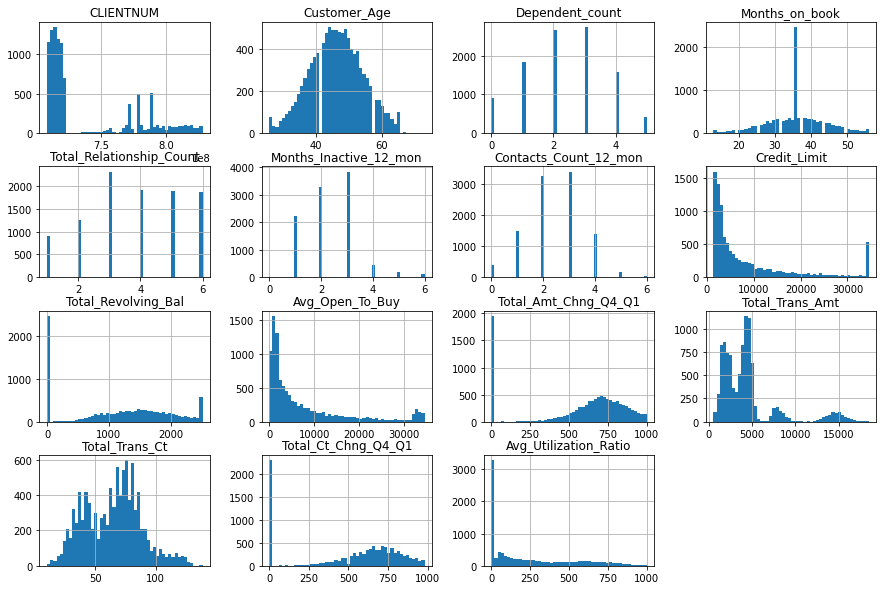

In [11]:
num_cols.hist(bins=50, figsize=(15,10))
plt.show()

><br><b>Dari visualisasi Numerical Features diatas, dapat kita simpulkan beberapa point :</b><br/>
Pada fitur Total_Trans_Amt(dalam 12 bulan terakhir) menampilkan distribusi multimoda, yang berarti distribusi tersbut memiliki beberapa grup lagi. Ini bisa menjadi eksperimen yang menarik untuk mencoba dan mengelompokkan grup yang berbeda dan melihat kesamaan dan perbedaan di antara mereka yang menciptakan mode berbeda dalam distribusi tersebut.<br>

#### Korelasi antar fitur numerik

Text(0.5, 1.0, 'Korelasi fitur numerik')

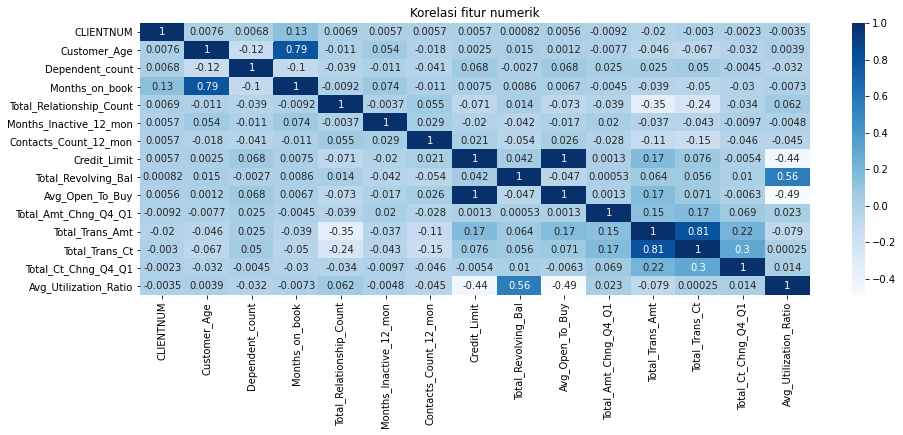

In [13]:
plt.figure(figsize=(15,5))

sns.heatmap(num_cols.corr(), 
        annot=True,
        cmap=plt.cm.Blues,
        xticklabels=df.select_dtypes(np.number).columns,
        yticklabels=df.select_dtypes(np.number).columns)
plt.title("Korelasi fitur numerik")

>Dari data diatas terlihat bahwa beberapa fitur saling memiliki korelasi tinggi, artinya jika a naik maka b juga naik.
Oleh karena itu, kita dapat menghapus fitur yang  berkorelasi tinggi yang akan dilakukan dalam proses pemilihan fitur.

# Data Preprocessing And Feature Engineering 

### A. Menangani Outlier

In [14]:
new = list(set(list_outlier))

In [15]:
cek_outlier(num_cols)

Customer_Age =  2
Months_on_book =  386
Months_Inactive_12_mon =  331
Contacts_Count_12_mon =  629
Credit_Limit =  984
Avg_Open_To_Buy =  963
Total_Amt_Chng_Q4_Q1 =  1954
Total_Trans_Amt =  896
Total_Trans_Ct =  2


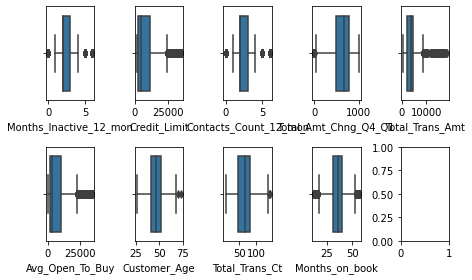

In [16]:
f, axes = plt.subplots(round(len(new)/5), 5)  
y = 0;
for name in new:
    i, j = divmod(y, 5)
    sns.boxplot(x=num_cols[name], ax=axes[i, j])
    y = y+1
plt.tight_layout()
plt.show()

>Dari data diatas terlihat bahwa terdapat outliers di beberapa fitur. 
Berikut ini adalah analisis outlier tiap fitur berdasarkan gambar diatas:

>1. Pada fitur Avg_Open_To_Buy menunjukan rata-rata dari selisih batas credit limit dengan balance yang tersisa sekarang. kita tidak perlu melakukan aksi apapun karena tidak aneh apabila ada outlier karena setiap pengguna dapat memiliki rata-rata yang berbeda dan outlier berurutan tidak jauh

>2. Pada fitur Total_Trans_Amt perlu kita analisis lagi apa dan lihat datanya apakah outlier pada fitur tersebut yang menunjukkan jumlah total pengeluaran tiap pelanggan merupakan keanehan pada data atau tidak

>3. Pada fitur Total_Amt_Change_Q4 kita tidak perlu melakukan aksi apapun karena fitur tersebut menunjukan perbedaan jumlah total transaksi di waktu Q4 dan Q1 sehingga jika terdapat outlier yang mendekati batas bawah, hal tersebut merupakan wajar karena bisa saja tidak terdapat atau sedikit perubahan total jumlah transaksi diantara waktu terbut

>4. Pada fitur Contacts_Count_12_mon menunjukkan berapa banyak bank dan pelanggan menghubungi dalam 12 bulan. Kita tidak perlu melakukan aksi apapun karena tidak terdapat outlier yang jauh 

>5. Pada fitur Months_on_book kita tidak perlu melakukan aksi apapun karena fitur tersebut menunjukan berapa lama hubungan pengguna dengan bank sehingga wajar apabila ada outlier karena setiap pengguna dapat memiliki waktu relationship berbeda 
dengan bank 

>6. Pada fitur Total_Trans_Ct perlu kita analisis lagi apa dan lihat datanya apakah outlier pada fitur tersebut memang menunjukkan banyanknya transaksi tiap pelanggan merupakan keanehan pada data secara keseluruhan atau tidak.

>7. Pada fitur Months_Inactive_2_mon menunjukkan berapa banyak bank dan pelanggan menghubungi dalam 12 bulan. Kita tidak perlu melakukan aksi apapun karena tidak terdapat outlier yang jauh  dan masih wajar jika terdapat outlier.

>8. Pada fitur Customer_Age kita tidak perlu melakukan aksi apapun karena tidak terdapat outlier yang jauh dan masih wajar jika terdapat outlier.

>9. Pada fitur  Credit_Limit kita tidak perlu melakukan aksi apapun karena tidak terdapat outlier yang jauh dan masih wajar jika terdapat outlier.

#### Analisis outlier fitur Total_Trans_Amt

<AxesSubplot:xlabel='Total_Trans_Amt', ylabel='Income_Category'>

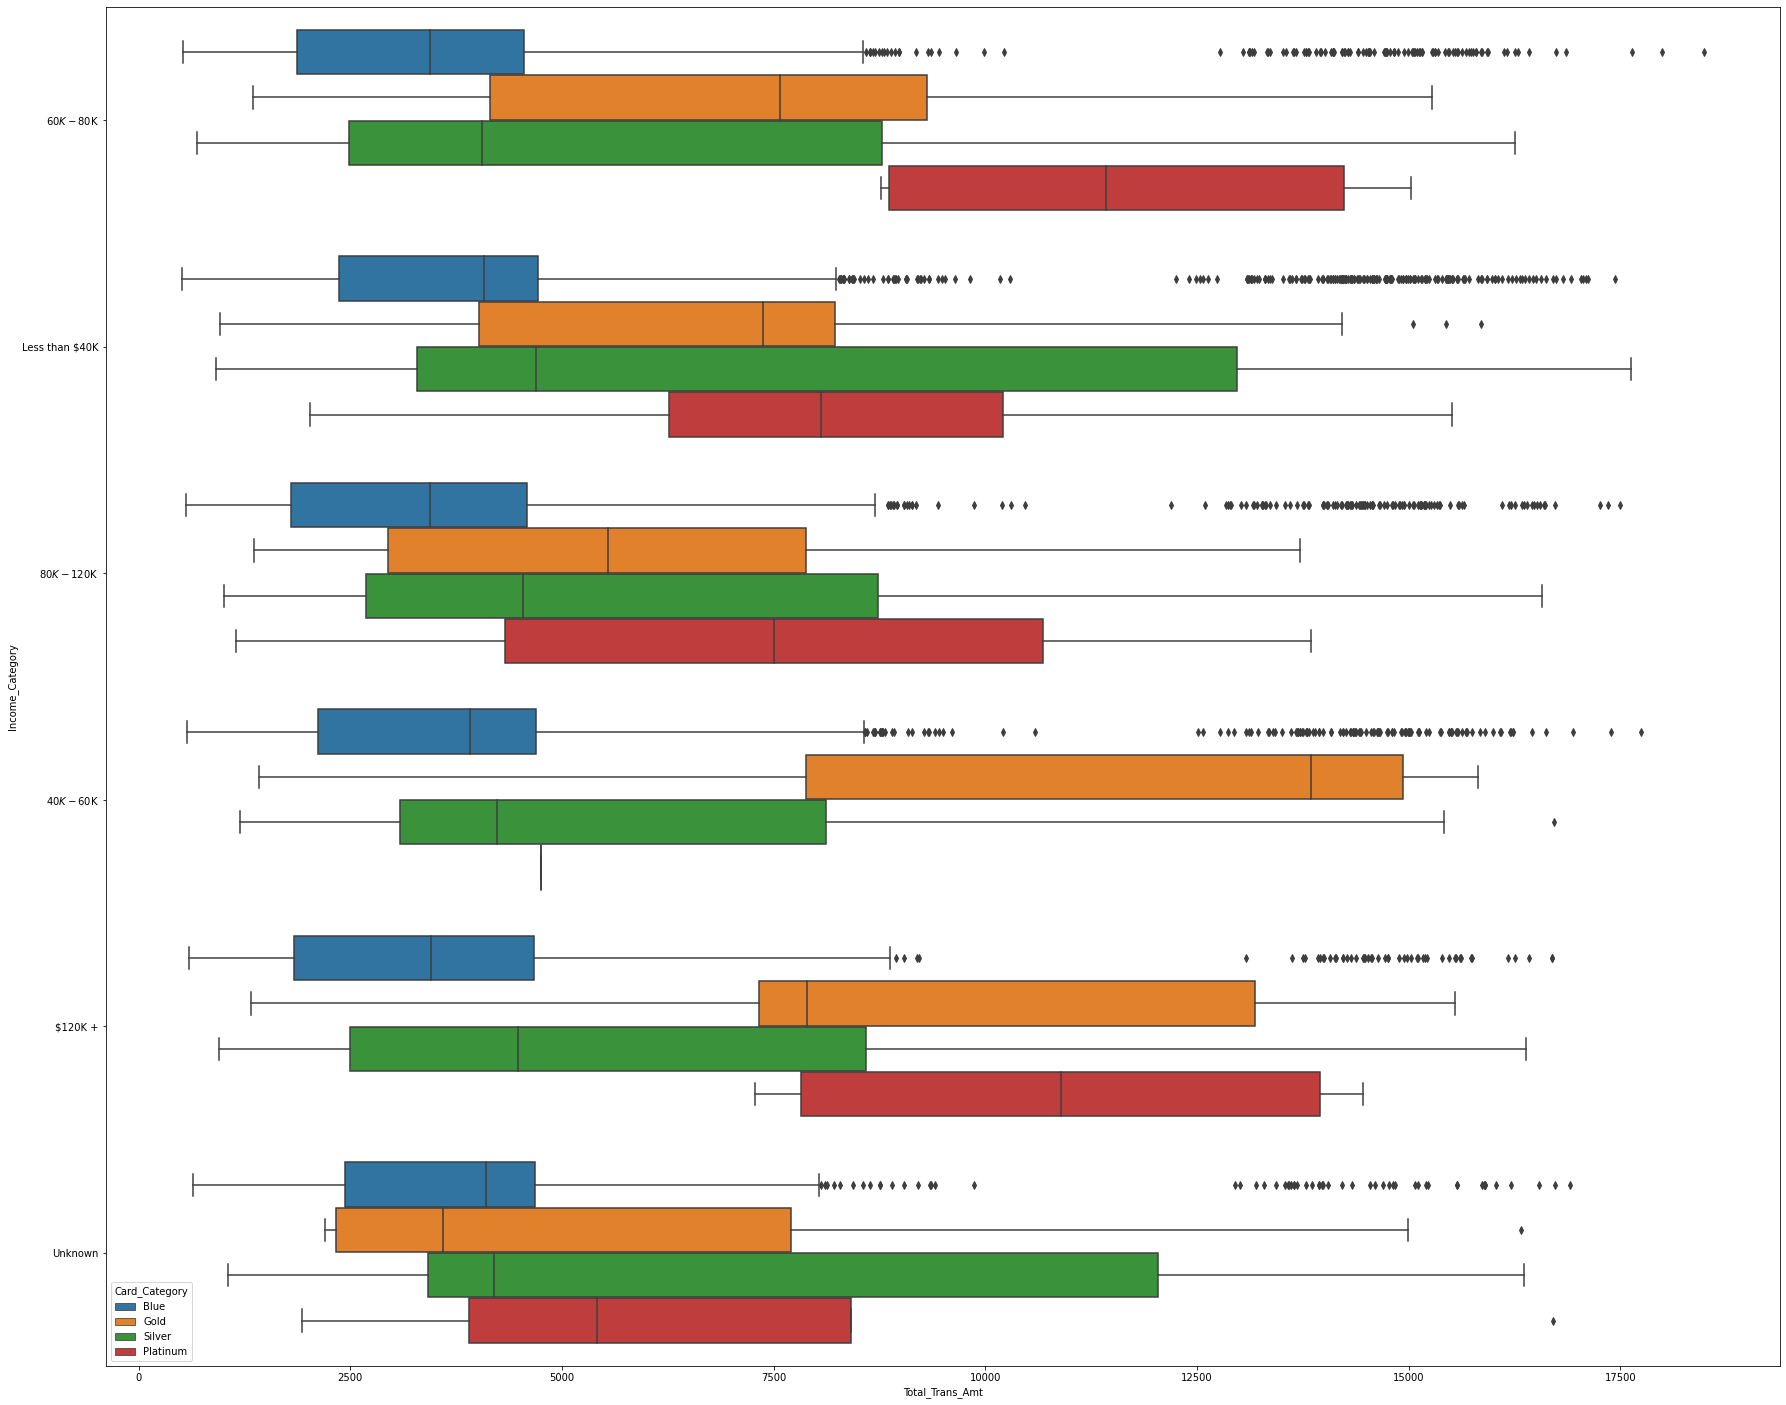

In [17]:
plt.figure(figsize=(30,25))
sns.boxplot(x='Total_Trans_Amt', y= 'Income_Category', hue='Card_Category', data=df)

> Dari data diatas terlihat bahwa suatu keanehan ketika card dengan batasan limit kartu  yang paling rendah memiliki banyak outlier dengan besarnya jumlah total transaksi pada kartu biru. Oleh karena itu, kita  hapus outliernya

In [18]:
#Hapus row outlier
Q1 = df['Total_Trans_Amt'].quantile(0.25)
Q3 = df['Total_Trans_Amt'].quantile(0.75)
IQR = Q3 - Q1
RLB  = Q1 - 1.5*IQR
RUB = Q3 + 1.5*IQR
data_clean = df.loc[(df['Total_Trans_Amt'] > RLB) & (df['Total_Trans_Amt']< RUB)]

In [19]:
num_cols = data_clean.select_dtypes(include=np.number)
categorical_features = data_clean.select_dtypes(include="object")

#### Analisis fitur Total_Trans_C

<AxesSubplot:xlabel='Total_Trans_Ct', ylabel='Income_Category'>

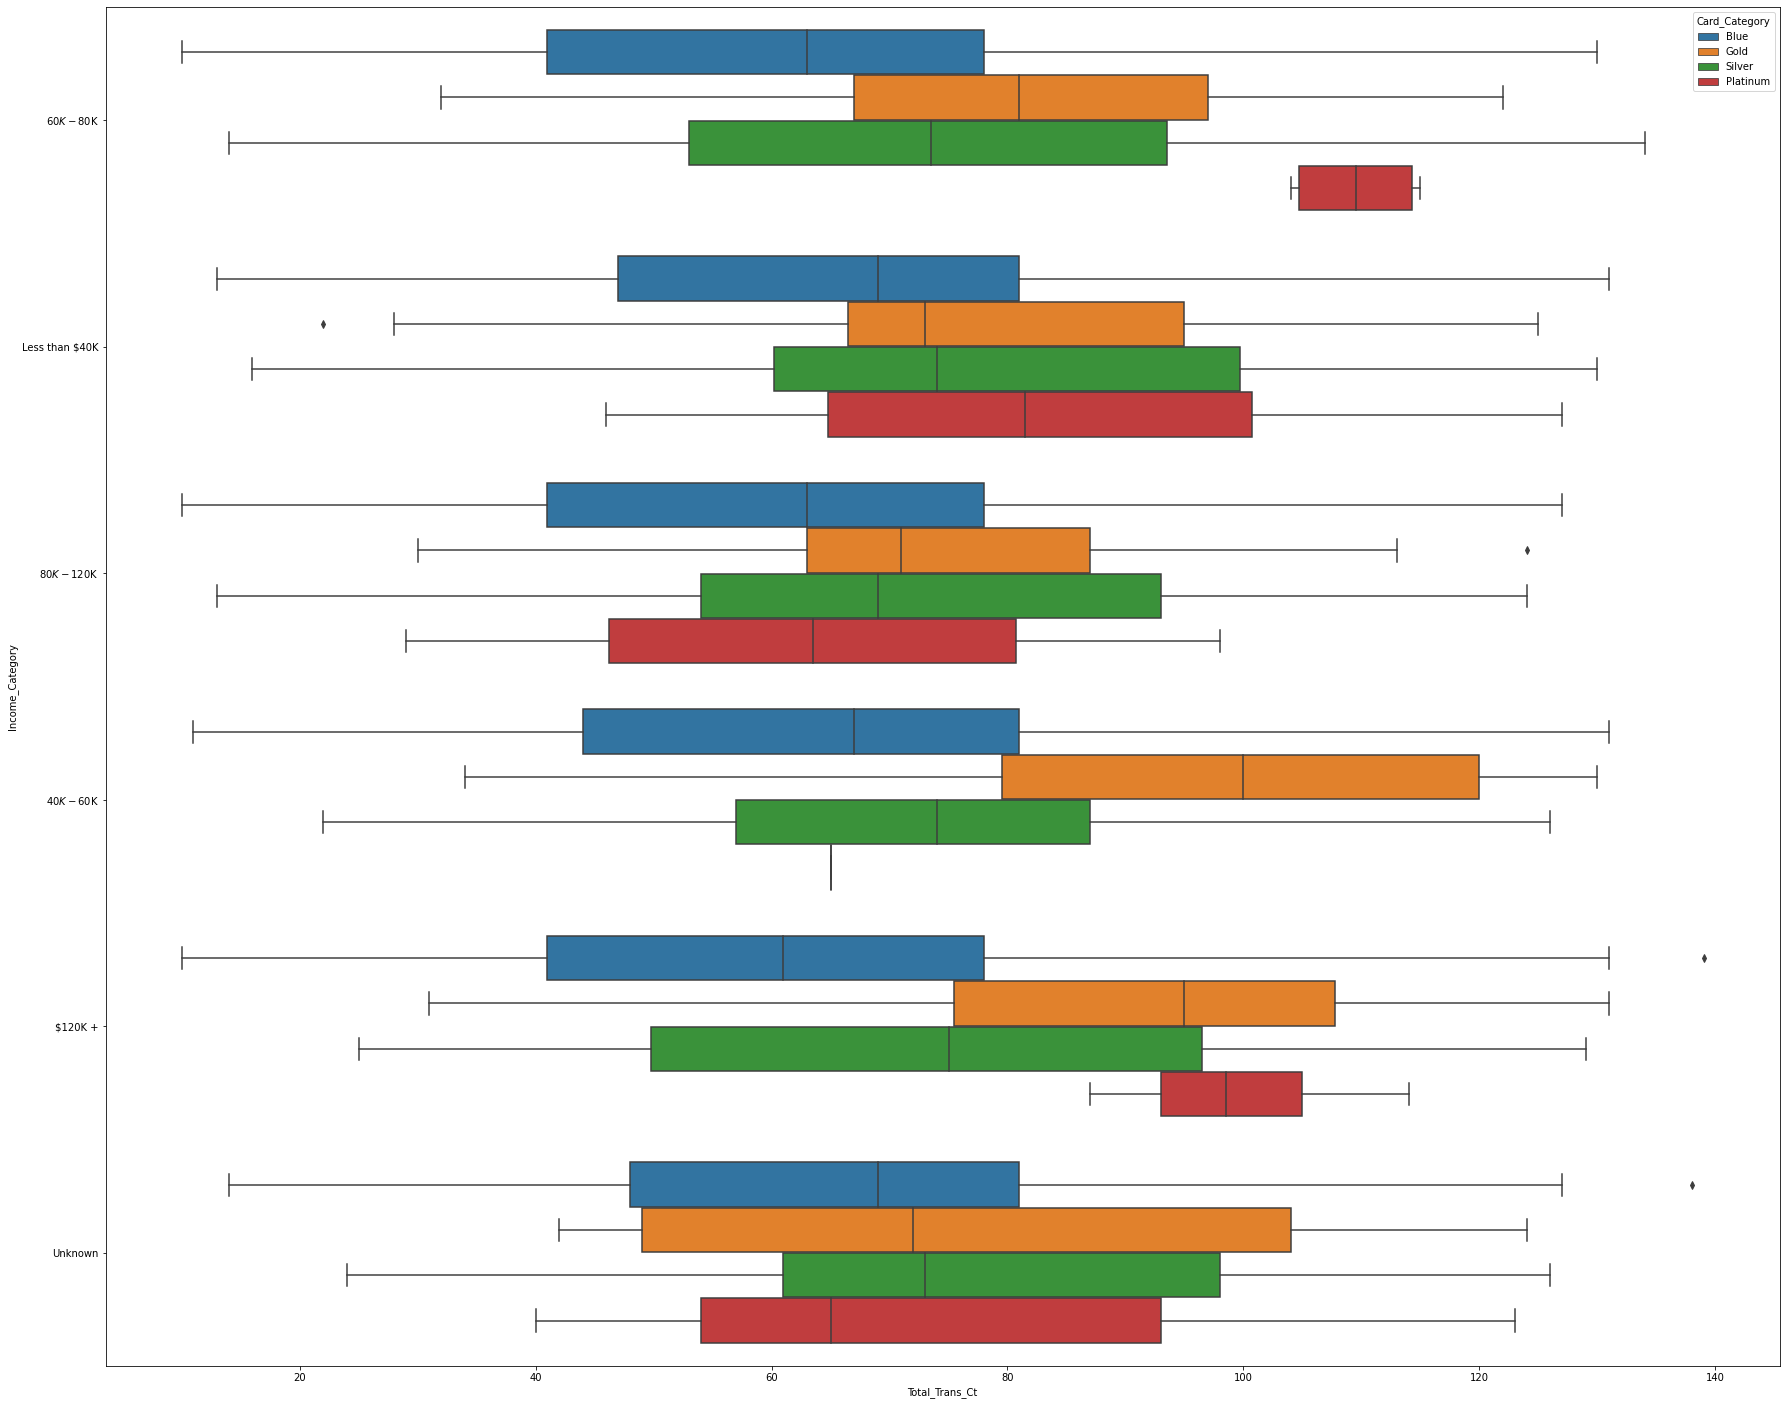

In [20]:
plt.figure(figsize=(30,25))
sns.boxplot(x='Total_Trans_Ct', y= 'Income_Category', hue='Card_Category', data=df)

> Dari hasil diatas, terihat bahwa outlier terjadi ketika tidak terlalu jauh dari batas RLB maupun RLUnya dan wajar jika terdapat outlier diatas sehingga tidak perlu aksi apapun

In [21]:
cek_outlier(num_cols)

Customer_Age =  2
Months_on_book =  527
Months_Inactive_12_mon =  306
Contacts_Count_12_mon =  599
Credit_Limit =  943
Avg_Open_To_Buy =  924
Total_Trans_Amt =  110


### B. Menangani Categorical Variable

In [22]:
#Gunakan One Hot Encoding karena nominal variables (gender,marital status, etc.) bukan ordinal values
#dan juga karena beberapa atribut walaupun ranked variables tetapi mempunyai "Unknown" value, karena kita tidak bisa memastikan
# ranked tersebut maka tidak dapat diubah ke ordinal variable untuk menggunakan Label Encoding 

target = categorical_features.Attrition_Flag.replace({'Attrited Customer':1,'Existing Customer':0})

cat_cols=pd.get_dummies(categorical_features.drop(columns=['Attrition_Flag']))
cat_cols.shape

(9231, 23)

 ### C. Drop Fitur numerik yang memiliki korelasi yang tinggi sehingga kita pilih 1 fitur  saja

In [23]:
correlated_features = set()
correlation_matrix = num_cols.corr()

# Analisis dan Drop fitur yang mempunyai pearson coffecients lebih besar dari 0.7
for i in range(len(correlation_matrix .columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.7:
            colname = correlation_matrix.columns[i]
            rowname = correlation_matrix.columns[j]
            correlated_features.add(colname)
            correlated_features.add(rowname)
correlated_features 

{'Avg_Open_To_Buy',
 'Credit_Limit',
 'Customer_Age',
 'Months_on_book',
 'Total_Trans_Amt',
 'Total_Trans_Ct'}

Penjelasan :
1. AVG open to buy memiliki korelasi yang tinggi dengan credit limit karena AVG open to buy merupakan fitur dimana hasil rata2 dari credit limit dikurangi ballance terbarunya selama 12 bulan sehingga masuk akal jika semakin tinggi batas credit limitnya makin tinggi AVG open to buy. Lalu, disini saya akan mendrop <b>credit limit</b> diantara kedua fitur yang berkorelasi tinggi tersebut credit limit dapat diwakilkan dengan AVG open to buy yang lebih spesifik untuk mengetahui kebiasaan pelanggan
2. Months on book adalah fitur dimana untuk menyatakan periode lamanya customer telah menggunakan layanan. Oleh karena, masuk akal jika fitur tersebut memiliki keterkaitan dengan umur pelanggan. Lalu, disini saya akan mendrop fitur <b>customer age</b>  diantara kedua fitur yang berkorelasi tinggi tersebut karena months on book merupakan salah satu fitur yang penting untuk kita analisis lebih jauh mengenai customer journey yang merupakan salah satu strategi penting dalam hal customer retention(mempertahankan pelanggan)
3. Jumlah total transaksi pelanggan berkorelasi dengan banyaknya transaksi yang dilakukan oleh pelanggan. Hal  itu masuk akal sehinggga berkorelasi tinggi antara 2 fitur tersebut. Namun , jika kita lihat lagi distribusinya, lebih baik kita tidak hapus salah satu dari fitur tersebut walaupun memiliki korelasi yang tinggi karena distribusi yang berbeda dari kedua fitur tersebut sehingga jika kita drop salah satu maka akan menghilangkan hal-hal yang kemungkinan relevan dengan prediksi target

In [24]:
num_cols = num_cols.drop(['Credit_Limit','Customer_Age'],axis=1)

### D. Scalling

In [25]:
#scalling menggunakan binning agar memperkecil range values, disini saya menggunaakan interval sampai 100 saja 
#karena tidak mengubah distribusi asli
for i in ['Total_Trans_Ct'  ,
          'Total_Trans_Amt',
          'Total_Revolving_Bal',
          'Avg_Open_To_Buy',
          'Total_Amt_Chng_Q4_Q1',
          'Total_Ct_Chng_Q4_Q1',
          'Avg_Utilization_Ratio',
    
         ]:
    col = num_cols[i]
    diff = col.max() - col.min()
    bins = np.digitize(col, np.arange(col.min(), col.max(), (diff/100)).tolist())
    num_cols[i] = bins

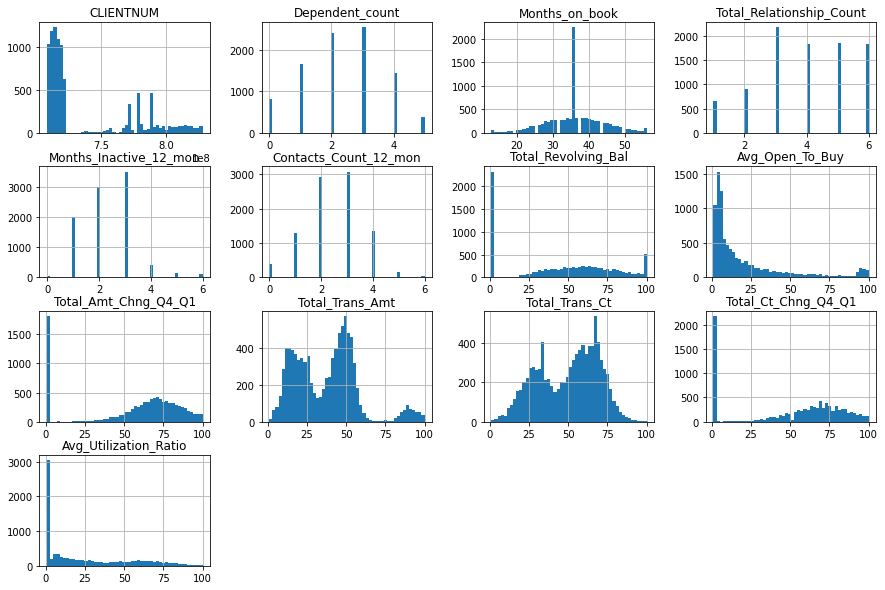

In [26]:
num_cols.hist(bins=50, figsize=(15,10))
plt.show()

### E. Data cleaned

In [27]:
#Gabungkan numeric dan variable
result = [target,num_cols,cat_cols]
df_cleaned = pd.concat(result, axis=1, join='inner')

# Menyiapkan Data

In [28]:
X = df_cleaned.drop(['Attrition_Flag','CLIENTNUM'],axis=1)
y = df_cleaned['Attrition_Flag']

> Pada X features drop 'Attrition_Flag' karena fitur tersebut merupakan target sehingga perlu dipisahkan dari X features yang 
berisi fitur yang dapat mempengaruhi prediksi target. Sedangkan Fitur 'CLIENTNUM' adalah fitur dari id client dan karena dipastikan 
unik semua sehingga fitur ini tidak mempengaruhi prediksi target sehingga lebih baik di drop saja.

#### Data Upsampling

Karena dataset imbalanced(dataset tidak siembang), terdapat dua teknik yang harus dilakukan untuk menangani kumpulan data yang tidak seimbang, yaitu oversampling atau undersampling.
Jika datanya terlalu besar kita dapat melakukan down sampling, tetapi karena dataset ini tidak terlalu besar, maka lakukan oversampling

Distribution of target Existing Customer & Attrited Customer: 7692 & 1539


<AxesSubplot:>

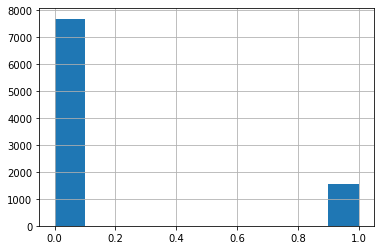

In [29]:
count = Counter(y)
print('Distribution of target Existing Customer & Attrited Customer:', count[0], '&', count[1])
y.hist()

Distribution of target Existing Customer & Attrited Customer: 7692 & 7692


<AxesSubplot:>

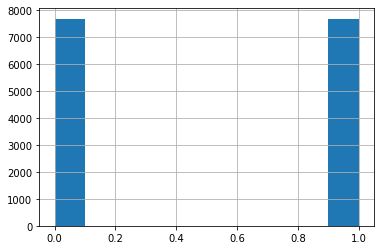

In [30]:
smote = SMOTE()
X, y = smote.fit_resample(X, y)
count = Counter(y)
print('Distribution of target Existing Customer & Attrited Customer:', count[0], '&', count[1])
y.hist()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, shuffle= True,stratify = y)
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(12307, 35) (12307,) (3077, 35) (3077,)


# Model Building

In [32]:
classifiers = [[RandomForestClassifier(),'Random Forest'], 
[KNeighborsClassifier(), 'K-Nearest Neighbours'], [SGDClassifier(),'SGD Classifier'], [SVC(),'SVC']]

In [33]:
accuracy_list = []
recall_list = []
cross_val_list = []

for classifier in classifiers:
    model = classifier[0]
    model_name = classifier[1]
    
    cls= model.fit(X_train, y_train)
    
    pred = cls.predict(X_test)

    accuracy = accuracy_score(y_test,pred)
    recall = recall_score(y_test,pred) 
    cross_val = cross_val_score(model, X_test, y_test).mean()
   
    
    accuracy_list.append(accuracy)
    recall_list.append(recall)
    cross_val_list.append(cross_val)
   
    print(model_name, 'Accuracy:     ' + str(round(accuracy*100, 2)) + '%')
    print(model_name,'Recall:    '+ str(round(recall*100, 2)) + '%')
    print(model_name, 'cross val score: ' +str(round(cross_val*100, 2)) + '%')
    print("\n")

Random Forest Accuracy:     97.5%
Random Forest Recall:    97.27%
Random Forest cross val score: 95.35%


K-Nearest Neighbours Accuracy:     93.4%
K-Nearest Neighbours Recall:    98.05%
K-Nearest Neighbours cross val score: 88.53%


SGD Classifier Accuracy:     87.55%
SGD Classifier Recall:    78.67%
SGD Classifier cross val score: 79.21%


SVC Accuracy:     91.39%
SVC Recall:    92.13%
SVC cross val score: 88.27%




# Analisis Model

Pada hasil diatas, terlihat bahwa hasil model mengunakan algoritma Random Forest memberikan hasil yang terbaik dengan mempertimbangkan accuracy dan recall yang tinggi dibandingkan algoritma lainnya. Random Forest adalah teknik yang berguna untuk klasifikasi dan dapat menangani data nonlinier secara efisien. Tidak seperti yang lain, ini bekerja lebih baik jika fitur berkorelasi ada dalam data. RF memberikan hasil yang lebih baik karena ditangani dengan sangat baik dengan data saya dan menghasilkan kinerja yang lebih baik dibandingkan dengan teknik lainnya. RF menggunakan beberapa pohon keputusan untuk membuat prediksi. 

In [34]:
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)

accuracy = accuracy_score(y_test,pred)
recall = recall_score(y_test,pred) 
cross_val = cross_val_score(model, X_test, y_test).mean()

print('Hasil prediksi model menggunakan Random Forest Calssification')
print('Accuracy:     ' + str(round(accuracy*100, 2)) + '%')
print('Recall:    '+ str(round(recall*100, 2)) + '%')
print('cross val score: ' +str(round(cross_val*100, 2)) + '%')

Hasil prediksi model menggunakan Random Forest Calssification
Accuracy:     97.6%
Recall:    97.4%
cross val score: 95.29%


Hasil keseluruhan algoritma Random Forest dalam hal akurasi lebih baik daripada algoritma lain untuk masalah prediksi karena RF menggunakan pendekatan divide and conquers. Itu membuat tipe angka dari pohon keputusan dan setiap Pohon Keputusan dilatih dengan memilih atribut acak dari seluruh kumpulan atribut prediktif. Setiap pohon tumbuh hingga tingkat maksimum berdasarkan subset fitur. Setelah itu, Pohon Keputusan akhir dibuat untuk prediksi set data pengujian. RF bekerja pada set data besar dan menangani variabel yang hilang tanpa penghapusan variabel. Random Forest menangani nilai yang hilang di dalam dataset untuk melatih model. Lalu,Random Forest memiliki nilai recall maksimum. Artinya, algoritma ini menemukan jumlah maksimum positif benar dalam kumpulan data dan dapat mengidentifikasi pelanggan yang churn dengan benar. Hal inilah yang membuat performa RF bagus dan algoritma yang tepat untuk memprediksi cusstomer churn sesuai dengan tujuan kita agar mendapatkan prediksi dengan performa yang maksimal

## Kesimpulan

Pada model yang telah kita bangun diatas, kita dapat memprediksi pelanggan mana saja di masa depan yang kemungkinan akan berhenti
melakukan layanan jika hasil pada prediction data test target Attrition_Flag bernilai 1 . Hal itu menunjukkan bahwa 
pelanggan tersebut kemungkinan akan berhenti menggunakan layanan kartu kreditnya dari bank tersebut.
Oleh karena itu, perusahaan  dapat mengetahui siapa saja orang yang akan meninggalkan bank di masa depan sehingga 
perusahaan dapat memberikan penawaran yang lebih baik kepada pelanggan tersebut agar tetap bersama mereka dan mempertahankan pelanggan yang sudah ada.

#### Terima Kasih